<table style="width: 100%;"> <tr> <td style="width: 20%; vertical-align: top;"> <img src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" alt="UdeA" height="150px"> </td> <td style="width: 80%; padding-left: 20px;"> <strong style="font-size: 30px;">MODELOS DE RECOMENDACIÓN PARA EL DESARROLLO DE UN SISTEMA DE RECOMENDACIÓN DE PELÍCULAS - PROYECTO MARKETING</strong><br><br> <span style="font-size: 30px;"> Luisa Fernanda Alzate Cuartas <br> Juan Camilo Henao Caro<br>Isabella Mendez Hoyos<br> Fernando Antonio Piñeres Ramos </span> </td> </tr> </table>

#### LIBRERÍAS REQUERIDAS

In [1]:
#Conexión de Google Colab con Drive.
from google.colab import drive
drive.mount('/content/drive')

#Acceder a los archivos de la carpeta marketing para el uso de funciones.
import sys
sys.path.append('/content/drive/MyDrive/marketing/Marketing')

Mounted at /content/drive


In [2]:
import pandas as pd # Manipulación y el analísis de datos.
import sqlite3 as sql # Interactuar con base de datos SQL usando Python.

import matplotlib.pyplot as plt
import seaborn as sns

#### CONEXIÓN CON LA BASE DE DATOS

In [3]:
#Establece una conexión a la base de datos SQLite ubicada en "content/db_movies"
conexion = sql.connect('/content/drive/MyDrive/marketing/Marketing/data/db_movies_copy.db')

# Crear un cursor a partir de la conexión, que permita ejecutar comando SQL sobre la base de datos.
cur = conexion.cursor()

In [4]:
# Ejecuta una consulta SQL que obtiene los nombres de todas las tablas existentes en la base de datos.
cur.execute("SELECT name FROM sqlite_master where type='table' ")

# Recupera todos los resultados de la consulta anterior en forma de lista de tuplas.
cur.fetchall()

[('ratings',), ('movies',)]

In [9]:
table_movies = pd.read_sql_query("SELECT * FROM movies", conexion)
table_movies.head()

,movieId,año,titulo,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,117867,2014,'71,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,97757,2004,'Hellboy': The Seeds of Creation,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26564,1986,'Round Midnight,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,27751,2004,'Salem's Lot,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,779,1997,'Til There Was You,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
table_ratings = pd.read_sql_query("SELECT * FROM ratings", conexion)
table_ratings.head()

,userId,movieId,rating,day,month,hour,year
0,1,1,4.0,30,7,18,2000
1,1,3,4.0,30,7,18,2000
2,1,6,4.0,30,7,18,2000
3,1,47,5.0,30,7,19,2000
4,1,50,5.0,30,7,18,2000


####**SISTEMAS DE RECOMENDACION BASADA EN POPULARIDAD**
-------

In [105]:
import pandas as pd

query = """
SELECT
    m.titulo AS titulo_pelicula,
    COUNT(*) AS total_visualizaciones
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.movieId
ORDER BY total_visualizaciones DESC
LIMIT 10;
"""

populares = pd.read_sql(query, conexion)
display(populares)

,titulo_pelicula,total_visualizaciones
0,Forrest Gump,329
1,"Shawshank Redemption, The",317
2,Pulp Fiction,307
3,"Silence of the Lambs, The",279
4,"Matrix, The",278
5,Star Wars: Episode IV - A New Hope,251
6,Jurassic Park,238
7,Braveheart,237
8,Terminator 2: Judgment Day,224
9,Schindler's List,220


#**PELICULAS MEJOR CALIFICADAS CON MAS DE 50 RATINGS**

In [42]:
query = """
SELECT m.titulo,
       AVG(r.rating) AS avg_rating,
       COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE r.rating <> 0
GROUP BY m.titulo
HAVING num_ratings > 50
ORDER BY avg_rating DESC
LIMIT 10;
"""

pd.read_sql_query(query, conexion)



,titulo,avg_rating,num_ratings
0,"Shawshank Redemption, The",4.429022,317
1,"Godfather, The",4.289062,192
2,Fight Club,4.272936,218
3,Cool Hand Luke,4.271930,57
4,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97
5,Rear Window,4.261905,84
6,"Godfather: Part II, The",4.259690,129
7,"Departed, The",4.252336,107
8,Goodfellas,4.250000,126
9,Casablanca,4.240000,100


<ipython-input-43-049b398c86d5>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




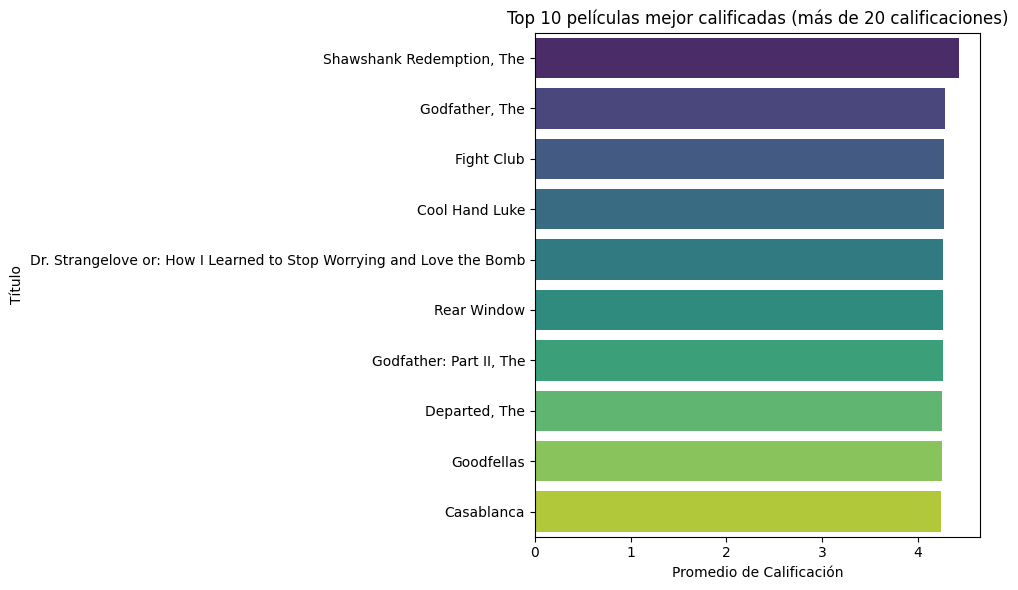

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta
query = """
SELECT m.titulo,
       AVG(r.rating) AS avg_rating,
       COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE r.rating <> 0
GROUP BY m.titulo
HAVING num_ratings > 50
ORDER BY avg_rating DESC
LIMIT 10;
"""
top_movies = pd.read_sql_query(query, conexion)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='avg_rating', y='titulo', palette='viridis')
plt.title('Top 10 películas mejor calificadas (más de 20 calificaciones)')
plt.xlabel('Promedio de Calificación')
plt.ylabel('Título')
plt.tight_layout()
plt.show()


###**Películas más vistas (más calificaciones), mostrando el promedio de los que calificaron**

In [53]:
pd.read_sql_query("""
SELECT m.titulo,
       AVG(IIF(r.rating = 0, NULL, r.rating)) AS avg_rating,
       COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.titulo
ORDER BY num_ratings DESC
LIMIT 10;
""", conexion)




,titulo,avg_rating,num_ratings
0,Forrest Gump,4.164134,329
1,"Shawshank Redemption, The",4.429022,317
2,Pulp Fiction,4.197068,307
3,"Silence of the Lambs, The",4.161290,279
4,"Matrix, The",4.192446,278
5,Star Wars: Episode IV - A New Hope,4.231076,251
6,Jurassic Park,3.750000,238
7,Braveheart,4.031646,237
8,Terminator 2: Judgment Day,3.970982,224
9,Schindler's List,4.225000,220


<ipython-input-44-149bea8913ed>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




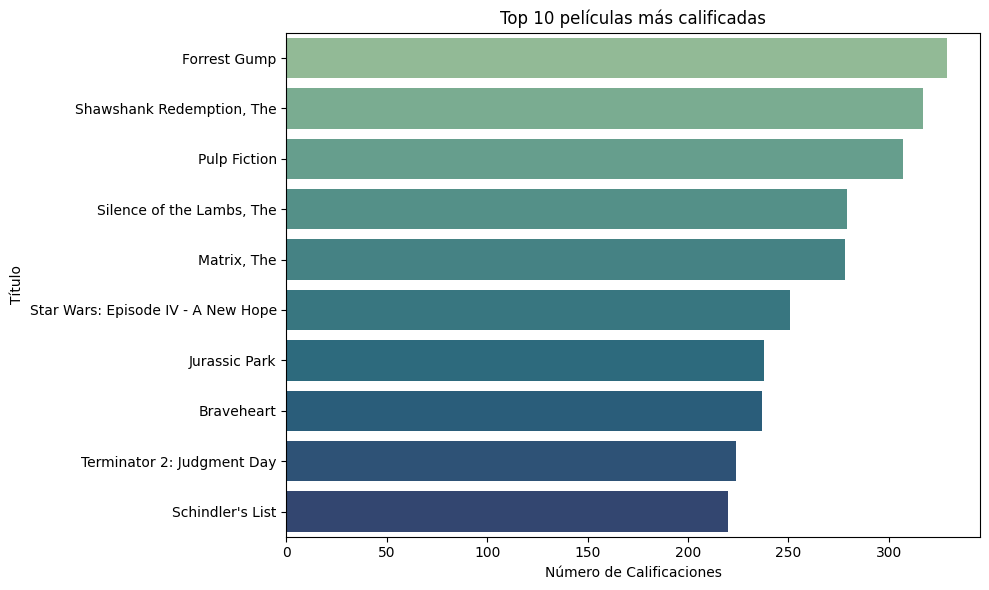

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta SQL
query = """
SELECT m.titulo,
       AVG(IIF(r.rating = 0, NULL, r.rating)) AS avg_rating,
       COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.titulo
ORDER BY num_ratings DESC
LIMIT 10;
"""
top_rated_movies = pd.read_sql_query(query, conexion)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_movies, x='num_ratings', y='titulo', palette='crest')
plt.title('Top 10 películas más calificadas')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Título')
plt.tight_layout()
plt.show()


###**MEJORES PELICULAS CALIFICADAS POR AÑO DE ESTRENO**

In [54]:
pd.read_sql_query("""
SELECT m.año, m.titulo,
       AVG(IIF(r.rating = 0, NULL, r.rating)) AS avg_rating,
       COUNT(IIF(r.rating = 0, NULL, r.rating)) AS valid_ratings,
       COUNT(*) AS total_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.año, m.titulo
ORDER BY m.año DESC, avg_rating DESC
LIMIT 10;
""", conexion)




,año,titulo,avg_rating,valid_ratings,total_ratings
0,2018,Won't You Be My Neighbor?,5.0,1,1
1,2018,Tom Segura: Disgraceful,4.5,1,1
2,2018,The Man Who Killed Don Quixote,4.5,1,1
3,2018,Sorry to Bother You,4.5,1,1
4,2018,Mamma Mia: Here We Go Again!,4.5,1,1
5,2018,Alpha,4.5,1,1
6,2018,Tag,4.0,1,1
7,2018,"Love, Simon",4.0,1,1
8,2018,Game Night,4.0,1,1
9,2018,Death Wish,4.0,1,1


<ipython-input-45-5f419544e17d>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




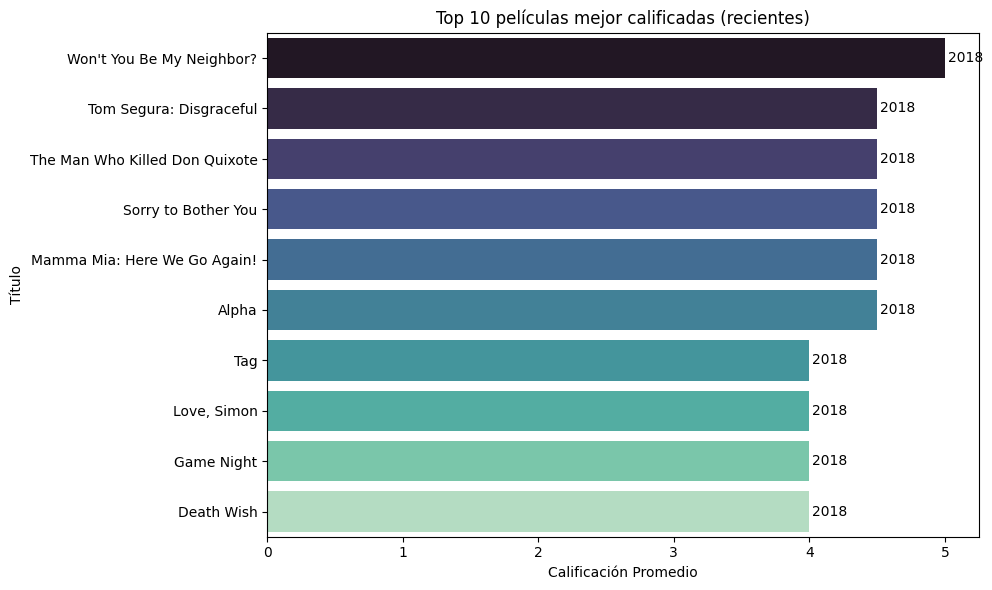

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta
query = """
SELECT m.año, m.titulo,
       AVG(IIF(r.rating = 0, NULL, r.rating)) AS avg_rating,
       COUNT(IIF(r.rating = 0, NULL, r.rating)) AS valid_ratings,
       COUNT(*) AS total_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.año, m.titulo
ORDER BY m.año DESC, avg_rating DESC
LIMIT 10;
"""
df_top_by_year = pd.read_sql_query(query, conexion)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_by_year, x='avg_rating', y='titulo', palette='mako')

# Etiquetas
plt.title('Top 10 películas mejor calificadas (recientes)')
plt.xlabel('Calificación Promedio')
plt.ylabel('Título')

# Añadir etiquetas de año
for i, (rating, year) in enumerate(zip(df_top_by_year['avg_rating'], df_top_by_year['año'])):
    plt.text(rating + 0.02, i, str(year), va='center')

plt.tight_layout()
plt.show()


###**Películas con más géneros pero pocos ratings (joyas ocultas)**

In [55]:
query = """SELECT m.titulo,
       (Action + Adventure + Animation + Children + Comedy + Crime + Documentary +
        Drama + Fantasy + "Film-Noir" + Horror + IMAX + Musical + Mystery + Romance +
        "Sci-Fi" + Thriller + War + Western) AS num_genres,
       COUNT(r.rating) AS num_ratings
FROM movies m
LEFT JOIN ratings r ON r.movieId = m.movieId
GROUP BY m.movieId
HAVING num_genres >= 3 AND num_ratings < 10
ORDER BY num_genres DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,num_genres,num_ratings
0,Rubber,10,2
1,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,8,1
2,Mars Needs Moms,7,1
3,Aelita: The Queen of Mars (Aelita),7,1
4,Aqua Teen Hunger Force Colon Movie Film for Th...,7,1
5,Pulse,7,2
6,Interstate 60,7,2
7,Osmosis Jones,7,8
8,Maximum Ride,6,1
9,Kingsglaive: Final Fantasy XV,6,1


###**PELICULAS RECIENTES MEJOR CALIFICADAS**

In [66]:
query = """SELECT m.titulo, m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE r.rating > 0
GROUP BY m.movieId
HAVING num_ratings > 50
ORDER BY m.año DESC, avg_rating DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,año,avg_rating,num_ratings
0,Deadpool,2016,3.833333,54
1,Guardians of the Galaxy,2014,4.050847,59
2,Interstellar,2014,3.993151,73
3,"Grand Budapest Hotel, The",2014,3.778846,52
4,"Wolf of Wall Street, The",2013,3.916667,54
5,"Dark Knight Rises, The",2012,3.993421,76
6,Django Unchained,2012,3.943662,71
7,"Avengers, The",2012,3.869565,69
8,The Hunger Games,2012,3.435185,54
9,Toy Story 3,2010,4.109091,55


<ipython-input-67-75eee835f9e0>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




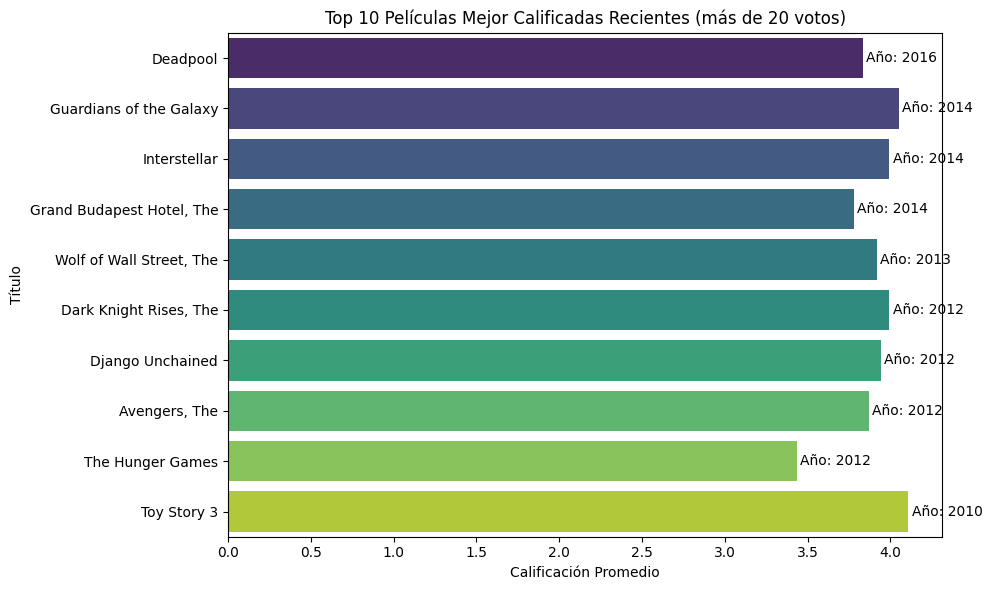

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta SQL
query = """
SELECT m.titulo, m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE r.rating > 0
GROUP BY m.movieId
HAVING num_ratings > 50
ORDER BY m.año DESC, avg_rating DESC
LIMIT 10;
"""
df_top_movies = pd.read_sql_query(query, conexion)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_movies, x='avg_rating', y='titulo', palette='viridis')

# Etiquetas
plt.title('Top 10 Películas Mejor Calificadas Recientes (más de 20 votos)')
plt.xlabel('Calificación Promedio')
plt.ylabel('Título')

# Añadir etiquetas con el año al lado de cada barra
for i, (rating, year) in enumerate(zip(df_top_movies['avg_rating'], df_top_movies['año'])):
    plt.text(rating + 0.02, i, f"Año: {year}", va='center')

plt.tight_layout()
plt.show()


###**PELICULAS ANTIGUAS QUE SIGUEN SIENDO ALTAMENTE CALIFICADAS**

In [57]:
query = """SELECT m.titulo, m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE m.año < 1980
GROUP BY m.movieId
HAVING num_ratings > 15
ORDER BY avg_rating DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,año,avg_rating,num_ratings
0,"Streetcar Named Desire, A",1951,4.475000,20
1,"Hustler, The",1961,4.333333,18
2,Sunset Blvd. (a.k.a. Sunset Boulevard),1950,4.333333,27
3,Double Indemnity,1944,4.323529,17
4,"Philadelphia Story, The",1940,4.310345,29
5,Once Upon a Time in the West (C'era una volta ...,1968,4.305556,18
6,Lawrence of Arabia,1962,4.300000,45
7,"Godfather, The",1972,4.289062,192
8,Harold and Maude,1971,4.288462,26
9,Cool Hand Luke,1967,4.271930,57


<ipython-input-68-06b2aff91898>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




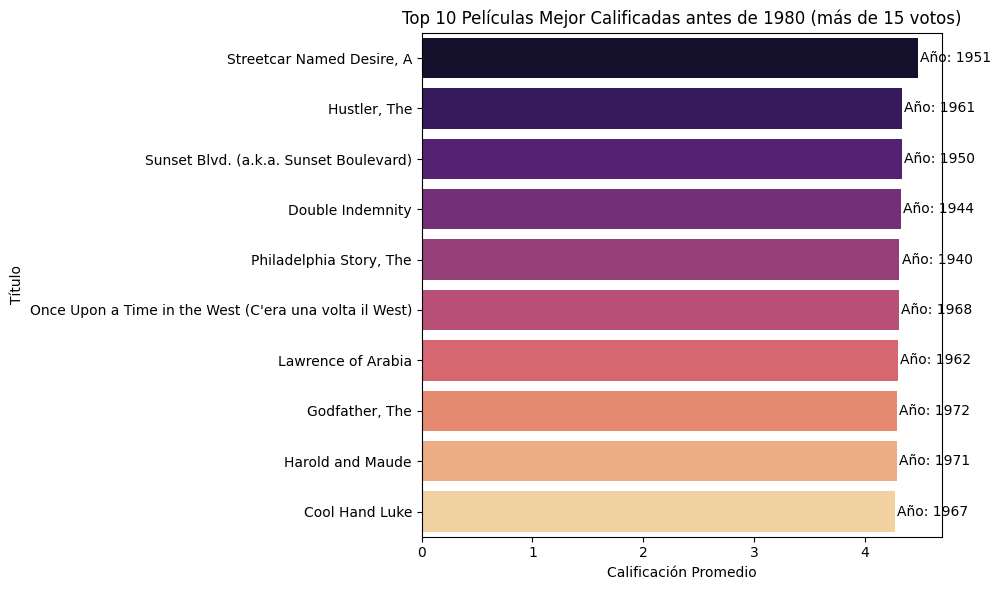

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta SQL
query = """
SELECT m.titulo, m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE m.año < 1980
GROUP BY m.movieId
HAVING num_ratings > 15
ORDER BY avg_rating DESC
LIMIT 10;
"""
df_old_movies = pd.read_sql_query(query, conexion)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_old_movies, x='avg_rating', y='titulo', palette='magma')

# Etiquetas
plt.title('Top 10 Películas Mejor Calificadas antes de 1980 (más de 15 votos)')
plt.xlabel('Calificación Promedio')
plt.ylabel('Título')

# Mostrar el año al lado de cada barra
for i, (rating, year) in enumerate(zip(df_old_movies['avg_rating'], df_old_movies['año'])):
    plt.text(rating + 0.02, i, f"Año: {year}", va='center')

plt.tight_layout()
plt.show()


###**EVOLUCION DE CALIFICACIONES PROMEDIO POR AÑO**

In [58]:
query = """SELECT m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.año
HAVING num_ratings > 20
ORDER BY m.año;
"""
pd.read_sql_query(query, conexion)


,año,avg_rating,num_ratings
0,1927,3.689655,29
1,1931,3.605263,76
2,1932,3.333333,24
3,1933,3.730769,65
4,1934,4.088235,34
...,...,...,...
83,2014,3.512879,1320
84,2015,3.412200,1082
85,2016,3.394737,779
86,2017,3.578714,451


<Axes: title={'center': 'Promedio de Rating por Año de Estreno'}, xlabel='año'>

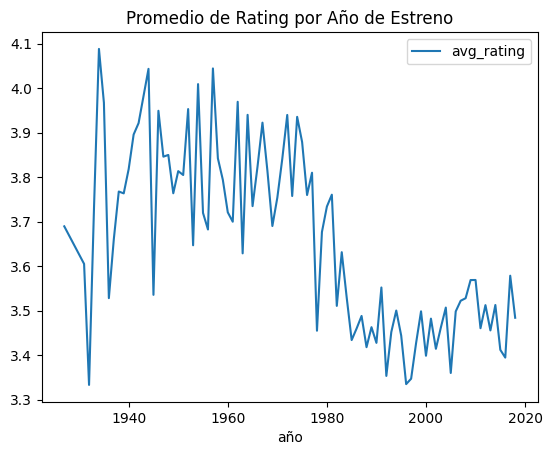

In [59]:
df_year = pd.read_sql(query, conexion)
df_year.plot(x='año', y='avg_rating', kind='line', title='Promedio de Rating por Año de Estreno')


###**USUARIOS QUE MAS CALIFICAN**

In [60]:
query = """SELECT userId, COUNT(*) AS num_ratings, AVG(rating) AS avg_rating
FROM ratings
GROUP BY userId
ORDER BY num_ratings DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,userId,num_ratings,avg_rating
0,414,2696,3.391320
1,599,2474,2.641471
2,474,2108,3.398956
3,448,1862,2.849087
4,274,1346,3.235884
5,610,1302,3.688556
6,68,1260,3.233730
7,380,1217,3.672966
8,606,1115,3.657399
9,288,1055,3.145972


<ipython-input-74-9c339254d1d6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




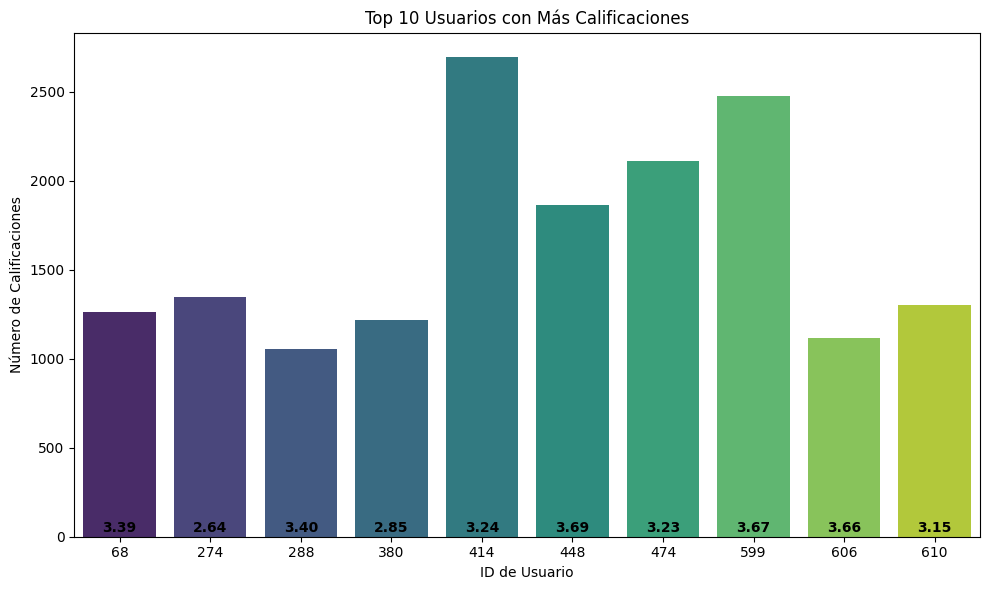

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='userId', y='num_ratings', data=df_top_users, palette='viridis')

# Mostrar el promedio en la base de cada barra
for i, row in df_top_users.iterrows():
    plt.text(i, 10,  # Coloca el texto ligeramente por encima de la base (ajusta el 10 si hace falta)
             f"{row['avg_rating']:.2f}",
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title("Top 10 Usuarios con Más Calificaciones")
plt.xlabel("ID de Usuario")
plt.ylabel("Número de Calificaciones")
plt.tight_layout()
plt.show()


###**HORA CON MAS ACTIVIDAD DE RATING**

In [75]:
query = """SELECT hour, COUNT(*) AS total_ratings
FROM ratings
GROUP BY hour
ORDER BY total_ratings DESC
LIMIT 10
"""
pd.read_sql_query(query, conexion)


,hour,total_ratings
0,20,6527
1,17,6341
2,21,6268
3,19,6201
4,18,5724
5,22,5387
6,16,5164
7,2,5134
8,1,4957
9,0,4481


###**PELICULAS QUE PERTENECEN A MAS GENEROS**

In [62]:
query = """SELECT titulo,
       (Action + Adventure + Animation + Children + Comedy + Crime + Documentary +
        Drama + Fantasy + "Film-Noir" + Horror + IMAX + Musical + Mystery + Romance +
        "Sci-Fi" + Thriller + War + Western) AS num_genres
FROM movies
ORDER BY num_genres DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,num_genres
0,Rubber,10
1,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,8
2,Aelita: The Queen of Mars (Aelita),7
3,Aqua Teen Hunger Force Colon Movie Film for Th...,7
4,Enchanted,7
5,Inception,7
6,Interstate 60,7
7,Mars Needs Moms,7
8,Mulan,7
9,Osmosis Jones,7


###**PELICULAS CON MAYOR PROMEDIO DE CALIFICACIONES(MAS CONTROVERSIALES)**

In [63]:
query = """SELECT m.movieId, m.titulo,
       COUNT(*) AS num_ratings,
       AVG(r.rating) AS avg_rating
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.movieId, m.titulo;
"""
pd.read_sql_query(query, conexion)


,movieId,titulo,num_ratings,avg_rating
0,1,Toy Story,215,3.920930
1,2,Jumanji,110,3.431818
2,3,Grumpier Old Men,52,3.259615
3,4,Waiting to Exhale,7,2.357143
4,5,Father of the Bride Part II,49,3.071429
...,...,...,...,...
9680,193581,Black Butler: Book of the Atlantic,1,4.000000
9681,193583,No Game No Life: Zero,1,3.500000
9682,193585,Flint,1,3.500000
9683,193587,Bungo Stray Dogs: Dead Apple,1,3.500000


In [64]:
import pandas as pd

# Suponiendo que `conn` es tu conexión a SQLite
query = """
SELECT m.movieId, m.titulo,
       COUNT(*) AS num_ratings,
       AVG(r.rating) AS avg_rating
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.movieId, m.titulo;
"""
df = pd.read_sql(query, conexion)

# Agrega la desviación estándar en Python
ratings = pd.read_sql("SELECT * FROM ratings", conexion)
df_std = ratings.groupby("movieId")["rating"].std().reset_index()
df_std.columns = ["movieId", "std_rating"]

# Unir con el DataFrame anterior
final_df = pd.merge(df, df_std, on="movieId")
final_df.head()


,movieId,titulo,num_ratings,avg_rating,std_rating
0,1,Toy Story,215,3.920930,0.834859
1,2,Jumanji,110,3.431818,0.881713
2,3,Grumpier Old Men,52,3.259615,1.054823
3,4,Waiting to Exhale,7,2.357143,0.852168
4,5,Father of the Bride Part II,49,3.071429,0.907148


In [28]:
query = """SELECT m.titulo, m.año, AVG(r.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
WHERE r.rating > 0
GROUP BY m.movieId
HAVING num_ratings > 20
ORDER BY m.año DESC, avg_rating DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,año,avg_rating,num_ratings
0,Logan,2017,4.280000,25
1,Guardians of the Galaxy 2,2017,3.925926,27
2,Arrival,2016,3.980769,26
3,Rogue One: A Star Wars Story,2016,3.925926,27
4,Zootopia,2016,3.890625,32
5,Deadpool,2016,3.833333,54
6,Doctor Strange,2016,3.704545,22
7,Captain America: Civil War,2016,3.613636,22
8,The Martian,2015,4.000000,48
9,Kingsman: The Secret Service,2015,3.986111,36


###**Recomendación general: Mostrar las películas que son populares, tienen alta calificación y resisten el paso del tiempo**



In [80]:
query = """SELECT m.titulo,
       COUNT(*) AS num_ratings,
       AVG(r.rating) AS avg_rating,
       m.año  -- Ahora se usa "año" en lugar de "release_year"
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.movieId, m.titulo, m.año  -- Usa "año" en el GROUP BY
HAVING COUNT(*) > 100 AND AVG(r.rating) > 4.0 AND m.año < 2000
ORDER BY COUNT(*) DESC, AVG(r.rating) DESC
LIMIT 10;
"""
pd.read_sql_query(query, conexion)


,titulo,num_ratings,avg_rating,año
0,Forrest Gump,329,4.164134,1994
1,"Shawshank Redemption, The",317,4.429022,1994
2,Pulp Fiction,307,4.197068,1994
3,"Silence of the Lambs, The",279,4.161290,1991
4,"Matrix, The",278,4.192446,1999
5,Star Wars: Episode IV - A New Hope,251,4.231076,1977
6,Braveheart,237,4.031646,1995
7,Schindler's List,220,4.225000,1993
8,Fight Club,218,4.272936,1999
9,Star Wars: Episode V - The Empire Strikes Back,211,4.215640,1980


In [ ]:
## SISTEMAS DE RECOMENDACION BASADAS EN CONTENIDO

In [81]:
query_generos = """
SELECT movieId, titulo,
       Action, Comedy, Drama, Horror, Romance, Thriller,
       Adventure, Animation, Children, Documentary,
       Fantasy, IMAX, Musical, Mystery, War, Western, "Film-Noir"
FROM movies;
"""

peliculas_df = pd.read_sql_query(query_generos, conexion)
peliculas_df.set_index('movieId', inplace=True)


In [82]:
from sklearn.metrics.pairwise import cosine_similarity

# Extraer solo columnas de géneros
generos = peliculas_df.drop(columns=['titulo'])

# Calcular matriz de similitud
similitud = cosine_similarity(generos)

# Convertir a DataFrame
import numpy as np
similitud_df = pd.DataFrame(similitud, index=peliculas_df.index, columns=peliculas_df.index)


In [83]:
def recomendar_peliculas(movie_title, peliculas_df, similitud_df, top_n=5):
    # Buscar el ID de la película
    pelicula_id = peliculas_df[peliculas_df['titulo'].str.lower() == movie_title.lower()].index

    if pelicula_id.empty:
        print("Película no encontrada.")
        return

    pelicula_id = pelicula_id[0]

    # Obtener las similitudes
    similares = similitud_df[pelicula_id].sort_values(ascending=False)

    # Excluir la misma película
    similares = similares.drop(pelicula_id)

    # Obtener títulos de las películas similares
    recomendadas = peliculas_df.loc[similares.head(top_n).index, 'titulo']

    print(f"\n🎬 Películas similares a: {peliculas_df.loc[pelicula_id, 'titulo']}\n")
    for i, titulo in enumerate(recomendadas, 1):
        print(f"{i}. {titulo}")


In [84]:
recomendar_peliculas("Toy Story", peliculas_df, similitud_df)



🎬 Películas similares a: Toy Story

1. Adventures of Rocky and Bullwinkle, The
2. Tale of Despereaux, The
3. Asterix and the Vikings (Astérix et les Vikings)
4. The Good Dinosaur
5. Home


In [ ]:
## recoemndacion colaborativa

In [85]:
import pandas as pd

# Leer los datos de ratings (si no están cargados ya)
ratings_query = """
SELECT * FROM ratings;
"""
ratings_df = pd.read_sql_query(ratings_query, conexion)

# Crear la matriz de usuario vs película
ratings_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Ver la matriz de calificaciones
ratings_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Rellenar valores nulos con la media de las calificaciones de cada película
ratings_matrix_filled = ratings_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Ver la matriz con valores completados
ratings_matrix_filled.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,4.366379,4.000000,4.366379,4.366379,4.000000,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,4.000000,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [87]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud entre usuarios
user_similarity = cosine_similarity(ratings_matrix_filled)

# Convertir la matriz de similitudes a un DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix_filled.index, columns=ratings_matrix_filled.index)

# Ver las primeras similitudes
user_similarity_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.999540,0.998160,0.998164,0.999447,0.998588,0.998274,0.999449,0.999261,0.998669,...,0.999552,0.999010,0.994342,0.999343,0.998831,0.997378,0.999032,0.994775,0.999559,0.996020
2,0.999540,1.000000,0.998499,0.998417,0.999780,0.998974,0.998616,0.999754,0.999586,0.999020,...,0.999880,0.999354,0.994722,0.999706,0.999202,0.997699,0.999308,0.994893,0.999899,0.996356
3,0.998160,0.998499,1.000000,0.997016,0.998364,0.997615,0.997243,0.998351,0.998206,0.997639,...,0.998502,0.997956,0.993448,0.998325,0.997819,0.996182,0.997921,0.993456,0.998524,0.995045
4,0.998164,0.998417,0.997016,1.000000,0.998294,0.997567,0.997336,0.998315,0.998126,0.997690,...,0.998412,0.998032,0.993435,0.998238,0.997836,0.996321,0.997893,0.993248,0.998444,0.994881
5,0.999447,0.999780,0.998364,0.998294,1.000000,0.998887,0.998528,0.999656,0.999482,0.998889,...,0.999785,0.999269,0.994671,0.999606,0.999073,0.997622,0.999232,0.994793,0.999815,0.996228


In [88]:
def recomendar_peliculas_collaborative(user_id, ratings_matrix, user_similarity_df, top_n=5):
    # Obtener las películas que el usuario ya ha calificado
    rated_movies = ratings_matrix.loc[user_id].dropna().index

    # Obtener usuarios más similares
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id)

    # Tomar los usuarios más similares
    most_similar_users = similar_users.head(top_n).index

    # Recomendaciones basadas en los usuarios más similares
    recommended_movies = []
    for user in most_similar_users:
        movies_rated_by_similar_user = ratings_matrix.loc[user].dropna().index
        for movie in movies_rated_by_similar_user:
            if movie not in rated_movies:
                recommended_movies.append(movie)

    # Obtener los títulos de las películas recomendadas
    recommended_movie_titles = peliculas_df.loc[recommended_movies, 'titulo'].dropna()

    print(f"\n🎥 Películas recomendadas para el usuario {user_id}:\n")
    for i, movie in enumerate(recommended_movie_titles.head(top_n), 1):
        print(f"{i}. {movie}")


In [89]:
recomendar_peliculas_collaborative(8, ratings_matrix, user_similarity_df)



🎥 Películas recomendadas para el usuario 8:

1. Ace Ventura: When Nature Calls
2. Die Hard: With a Vengeance
3. Quiz Show
4. Ace Ventura: Pet Detective
5. Beverly Hills Cop III


In [ ]:
###recomendacion ppr genero

In [97]:
def recomendar_por_genero(df, genero, top_n=10, min_votos=10):
    """
    Recomienda películas dentro de un género específico.

    Parámetros:
    - df: DataFrame unido de ratings y movies
    - genero: string del nombre del género (por ejemplo, 'Comedy')
    - top_n: número de películas recomendadas
    - min_votos: mínimo de calificaciones para considerar la película

    Retorna:
    - DataFrame con películas recomendadas
    """
    # Verificar que el género existe en las columnas
    if genero not in df.columns:
        print(f"Género '{genero}' no encontrado.")
        return pd.DataFrame()

    # Filtrar las películas que pertenecen a ese género
    df_genero = df[df[genero] == 1]

    # Calcular promedio de rating y número de votos
    recomendaciones = (
        df_genero
        .groupby(['movieId', 'titulo'])
        .agg(promedio_rating=('rating', 'mean'), total_votos=('rating', 'count'))
        .reset_index()
    )

    # Filtrar por mínimo de votos
    recomendaciones = recomendaciones[recomendaciones['total_votos'] >= min_votos]

    # Ordenar por promedio de rating
    recomendaciones = recomendaciones.sort_values(by='promedio_rating', ascending=False)

    return recomendaciones.head(top_n)


In [99]:
# prompt: def recomendar_por_genero(df, genero, top_n=10, min_votos=10):
#     """
#     Recomienda películas dentro de un género específico.
#     Parámetros:
#     - df: DataFrame unido de ratings y movies
#     - genero: string del nombre del género (por ejemplo, 'Comedy')
#     - top_n: número de películas recomendadas
#     - min_votos: mínimo de calificaciones para considerar la película
#     Retorna:
#     - DataFrame con películas recomendadas
#     """
#     # Verificar que el género existe en las columnas
#     if genero not in df.columns:
#         print(f"Género '{genero}' no encontrado.")
#         return pd.DataFrame()
#     # Filtrar las películas que pertenecen a ese género
#     df_genero = df[df[genero] == 1]
#     # Calcular promedio de rating y número de votos
#     recomendaciones = (
#         df_genero
#         .groupby(['movieId', 'titulo'])
#         .agg(promedio_rating=('rating', 'mean'), total_votos=('rating', 'count'))
#         .reset_index()
#     )
#     # Filtrar por mínimo de votos
#     recomendaciones = recomendaciones[recomendaciones['total_votos'] >= min_votos]
#     # Ordenar por promedio de rating
#     recomendaciones = recomendaciones.sort_values(by='promedio_rating', ascending=False)
#     return recomendaciones.head(top_n) cuando agrego un genero me dice que no fue encontrado puedes solucionarlo

def recomendar_por_genero(df, genero, top_n=10, min_votos=10):
    """
    Recomienda películas dentro de un género específico.

    Parámetros:
    - df: DataFrame unido de ratings y movies
    - genero: string del nombre del género (por ejemplo, 'Comedy')
    - top_n: número de películas recomendadas
    - min_votos: mínimo de calificaciones para considerar la película

    Retorna:
    - DataFrame con películas recomendadas
    """
    # Convertir el nombre del género a mayúsculas para la comparación
    genero = genero.capitalize()

    # Verificar que el género existe en las columnas
    if genero not in df.columns:
        print(f"Género '{genero}' no encontrado. Por favor, verifica la ortografía o si el género está disponible.")
        return pd.DataFrame()

    # Filtrar las películas que pertenecen a ese género
    df_genero = df[df[genero] == 1]

    # Calcular promedio de rating y número de votos
    recomendaciones = (
        df_genero
        .groupby(['movieId', 'titulo'])
        .agg(promedio_rating=('rating', 'mean'), total_votos=('rating', 'count'))
        .reset_index()
    )

    # Filtrar por mínimo de votos
    recomendaciones = recomendaciones[recomendaciones['total_votos'] >= min_votos]

    # Ordenar por promedio de rating
    recomendaciones = recomendaciones.sort_values(by='promedio_rating', ascending=False)

    return recomendaciones.head(top_n)


In [101]:
recomendar_por_genero(df, 'Comedy', top_n=10)


Género 'Comedy' no encontrado. Por favor, verifica la ortografía o si el género está disponible.


""
